In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math score'],axis=1)

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable : ",df['gender'].unique())
print("Categories in 'race/ethnicity' variable : ",df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable : ",df['parental level of education'].unique())
print("Categories in 'lunch' variable : ",df['lunch'].unique())
print("Categories in 'test preparation course' variable : ",df['test preparation course'].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [7]:
y=df['math score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
nf=X.select_dtypes(exclude="object").columns
cf=X.select_dtypes(include="object").columns

In [10]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
nt=StandardScaler()
ot=OneHotEncoder()
pr=ColumnTransformer(
    [
        ("OneHotEncoder",ot,cf),
        ("Standard Scaler",nt,nf)
    ]
)

In [11]:
X=pr.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [14]:
def evaluate_model(t,p):
    mae=mean_absolute_error(t,p)
    mse=mean_squared_error(t,p)
    rmse=np.sqrt(mse)
    r2=r2_score(t,p)
    return mae,rmse,r2

In [15]:
ms={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Catboosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
ml,r2l=[],[]
for i in range(len(list(ms))):
    m=list(ms.values())[i]
    m.fit(X_train,y_train)

    y_train_pred=m.predict(X_train)
    y_test_pred=m.predict(X_test)

    m_train_mae,m_train_rmse,m_train_r2=evaluate_model(y_train,y_train_pred)
    m_test_mae,m_test_rmse,m_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(ms.keys())[i])
    ml.append(list(ms.keys())[i])

    print('Model performance for Training Set')
    print("- Root Mean Squared Error: {:.4f}".format(m_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(m_train_mae))
    print("- R2 Score: {:.4f}".format(m_train_r2))

    print('----------------------------------')

    print('Model performance for Testing Set')
    print("- Root Mean Squared Error: {:.4f}".format(m_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(m_test_mae))
    print("- R2 Score: {:.4f}".format(m_test_r2))
    r2l.append(m_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training Set
- Root Mean Squared Error: 5.3457
- Mean Absolute Error: 4.2875
- R2 Score: 0.8732
----------------------------------
Model performance for Testing Set
- Root Mean Squared Error: 5.3154
- Mean Absolute Error: 4.1581
- R2 Score: 0.8839


Lasso
Model performance for Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Testing Set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training Set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Testing Set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training Set
- Root Mean Squared Error: 5.7122
- Mean Absolute Error: 4.5187
- R2 Score: 0.8553
--------------

In [16]:
pd.DataFrame(list(zip(ml,r2l)),columns=['Model Name','R2 Score']).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
0,Linear Regression,0.883893
2,Ridge,0.880593
7,Catboosting Regressor,0.851632
5,Random Forest Regressor,0.850221
8,AdaBoost Regressor,0.847863
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.741368


In [17]:
lm=LinearRegression(fit_intercept=True)
lm=lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
s=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%s)

Accuracy of the model is 88.39


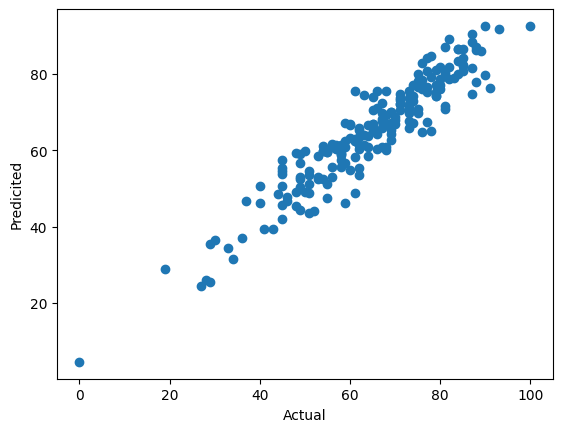

In [18]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicited');

<Axes: xlabel='math score'>

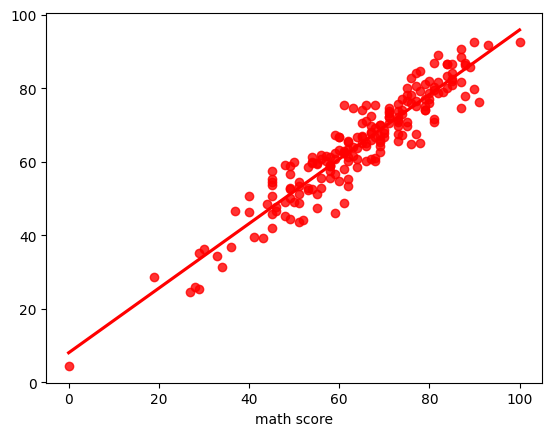

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.3125,14.6875
737,53,58.5625,-5.5625
740,80,77.1250,2.8750
660,74,77.1250,-3.1250
411,84,86.5000,-2.5000
...,...,...,...
408,52,44.0625,7.9375
332,62,61.4375,0.5625
208,74,67.2500,6.7500
613,65,67.0000,-2.0000
